Building a logistic regression model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_with_negation.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_with_negation.csv')

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['review_with_negation'])
X_test = vectorizer.transform(test_df['review_with_negation'])

# Encode the sentiment labels as numerical values
y_train = train_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values
y_test = test_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the sentiment on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.8962
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4993
           1       0.89      0.90      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Runnin cross validation for fine tuning

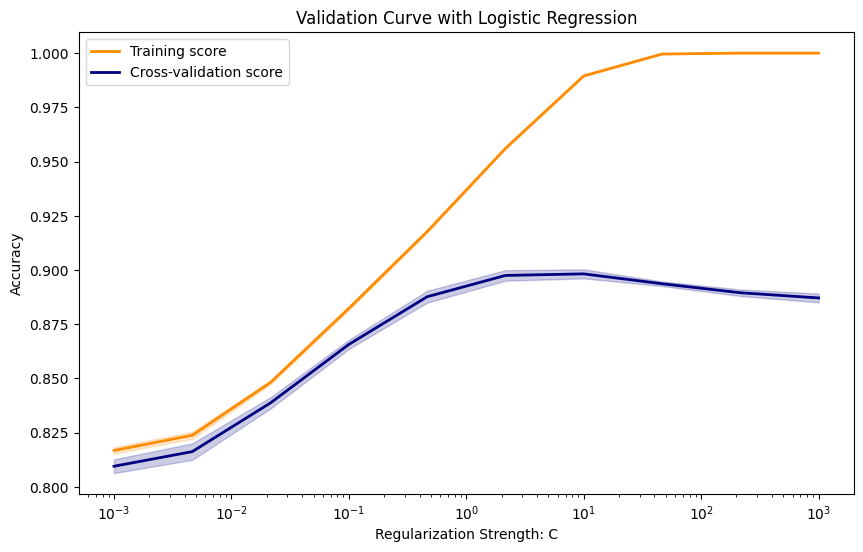

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

# Define a range of values for the regularization parameter C
param_range = np.logspace(-3, 3, 10)

# Compute training and test scores using the validation_curve function
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=1000),
    X_train,
    y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))

plt.semilogx(param_range, train_mean, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")

plt.semilogx(param_range, test_mean, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Regularization Strength: C")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


Training the model with the new C value.

In [ ]:

# Calculate the mean cross-validation score for each parameter value
test_mean = np.mean(test_scores, axis=1)
# Find the index of the maximum cross-validation score
max_index = np.argmax(test_mean)

# Find the value of 'C' that gives the maximum cross-validation score
optimal_C = param_range[max_index]

# Print the optimal value of C
print("The optimal value of C is:", optimal_C)

# Create and train the logistic regression model using the optimal value of 'C'
optimal_model = LogisticRegression(C=optimal_C, max_iter=1000)
optimal_model.fit(X_train, y_train)

# Use the optimal model to make predictions on the test set
y_pred = optimal_model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the accuracy and the classification report
print("Accuracy on the test set:", accuracy)
print("Classification report:")
print(report)


The optimal value of C is: 10.0
Accuracy on the test set: 0.9001
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4993
           1       0.90      0.90      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Confusion Matrix & ROC curves

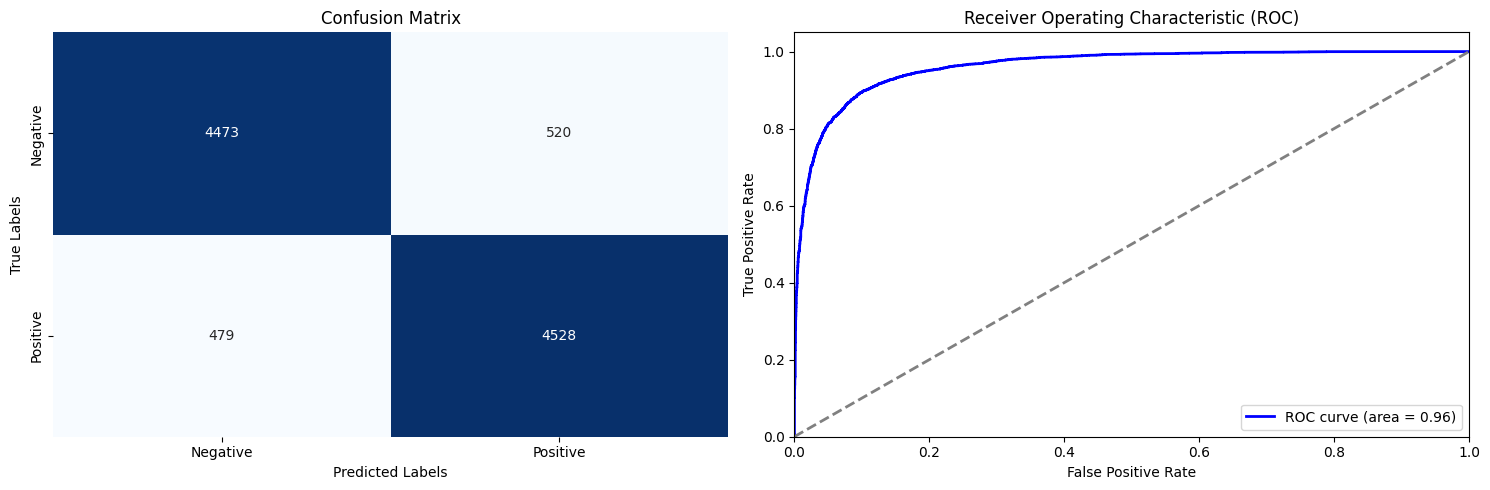

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your data, vectorized it, and trained your model
# Here's how to generate the confusion matrix and ROC curve:

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting both the confusion matrix and ROC curve
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix plot
sns.heatmap(conf_matrix, annot=True, fmt="d", ax=ax[0], cmap="Blues", cbar=False)
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_xticklabels(['Negative', 'Positive'])
ax[0].set_yticklabels(['Negative', 'Positive'], va='center')

# ROC Curve plot
ax[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

Trying the model without negation

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Load the datasets
train_df_wo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_2/train_without_negation.csv')
test_df_wo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_without_negation.csv')

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_wo = vectorizer.fit_transform(train_df_wo['review_without_negation'])
X_test_wo = vectorizer.transform(test_df_wo['review_without_negation'])

# Encode the sentiment labels as numerical values
y_train_wo = train_df_wo['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values
y_test_wo = test_df_wo['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Create and train the logistic regression model using the optimal value of 'C'
optimal_model = LogisticRegression(C=10, max_iter=1000)
optimal_model.fit(X_train_wo, y_train_wo)

# Use the optimal model to make predictions on the test set
y_pred_wo = optimal_model.predict(X_test_wo)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test_wo, y_pred_wo)

# Generate a classification report
report = classification_report(y_test_wo, y_pred_wo)

# Print the accuracy and the classification report
print("Accuracy on the test set:", accuracy)
print("Classification report:")
print(report)



Accuracy on the test set: 0.8987
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4993
           1       0.89      0.91      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

